In [1]:
#### 1.Loading_data_for_Clinical_data_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)



     blue     brown turquoise    yellow 
      103        47       135         1 

Loading required package: ggplot2


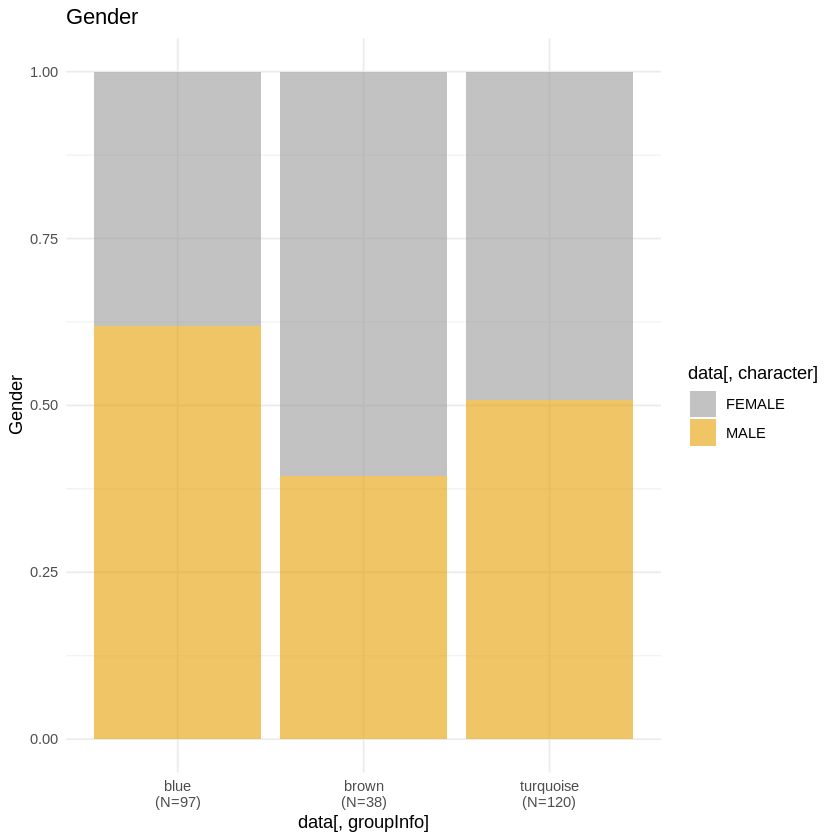

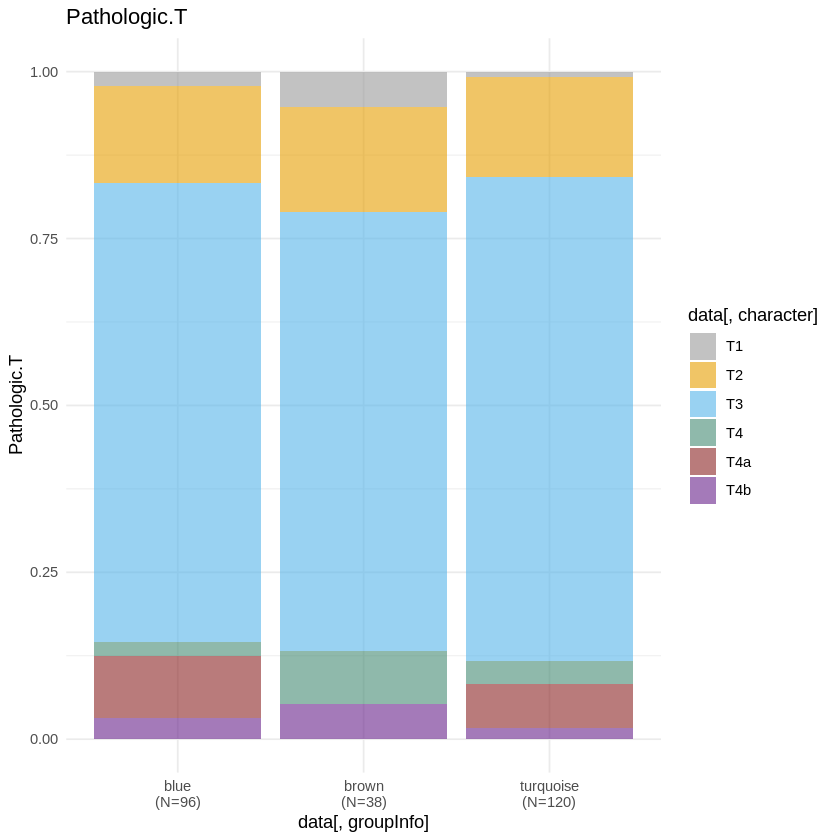

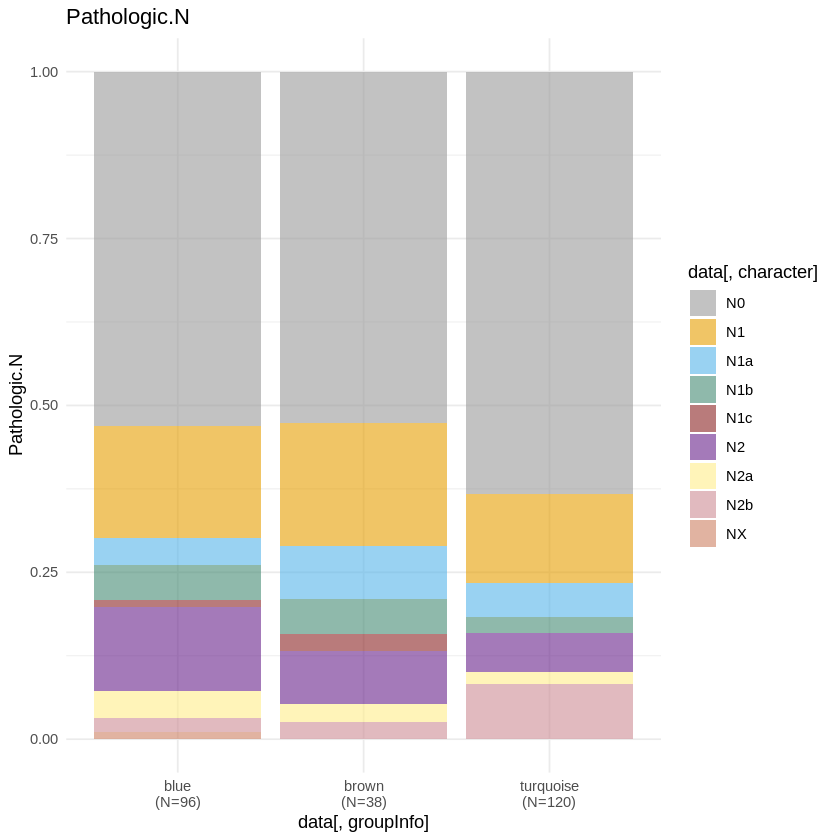

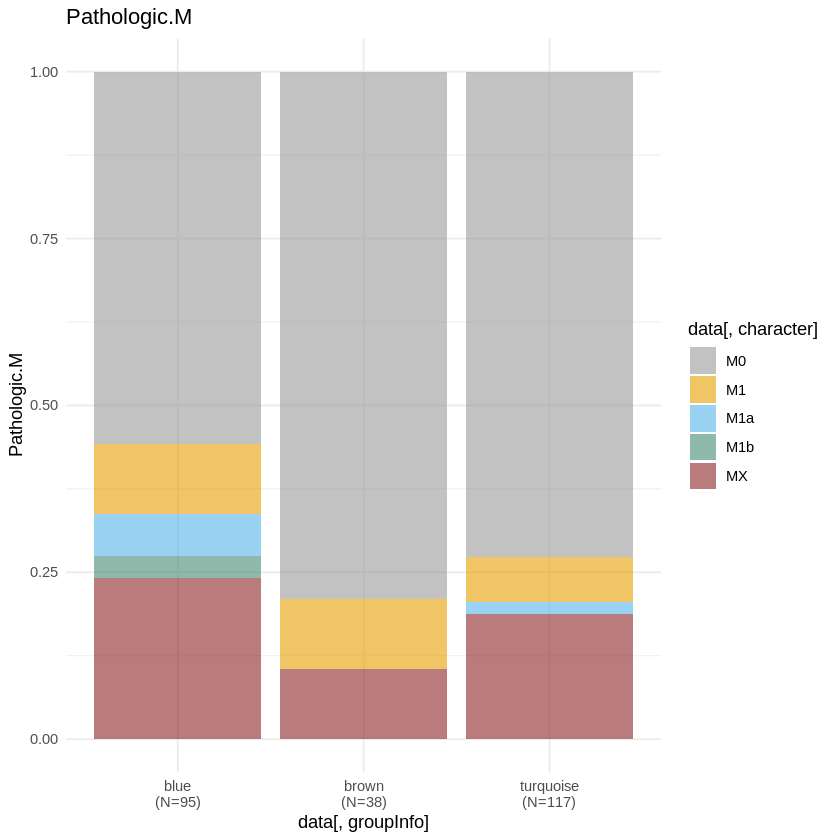

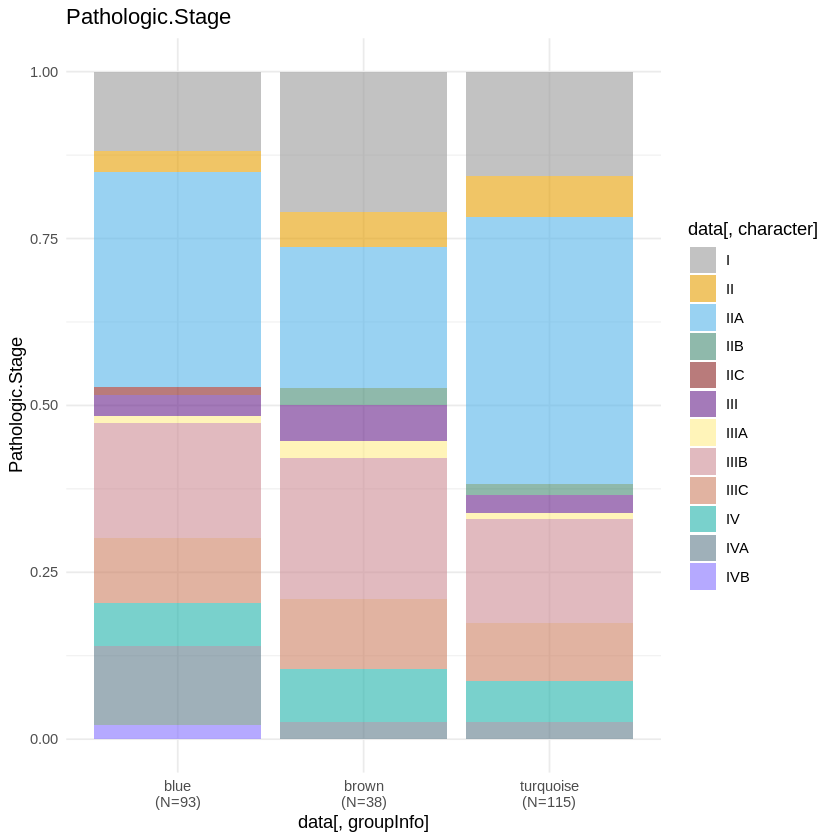

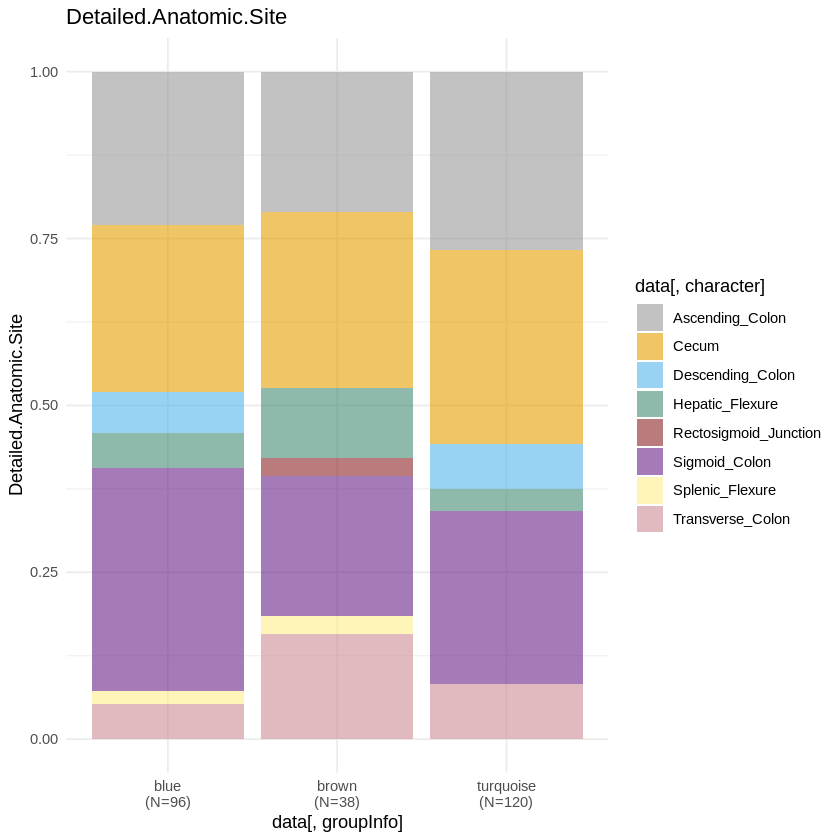

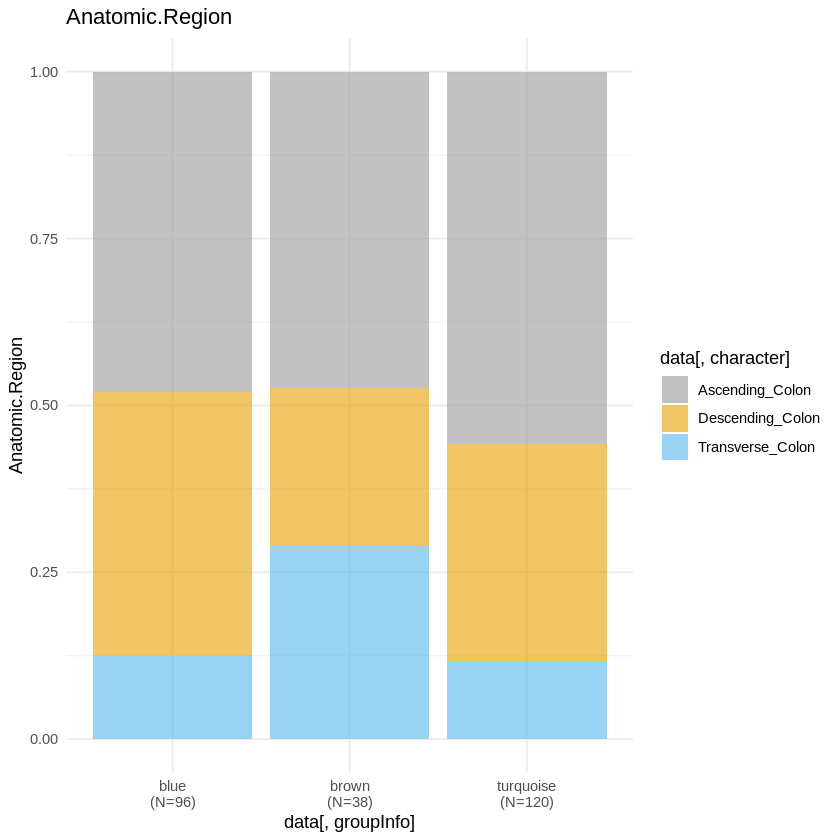

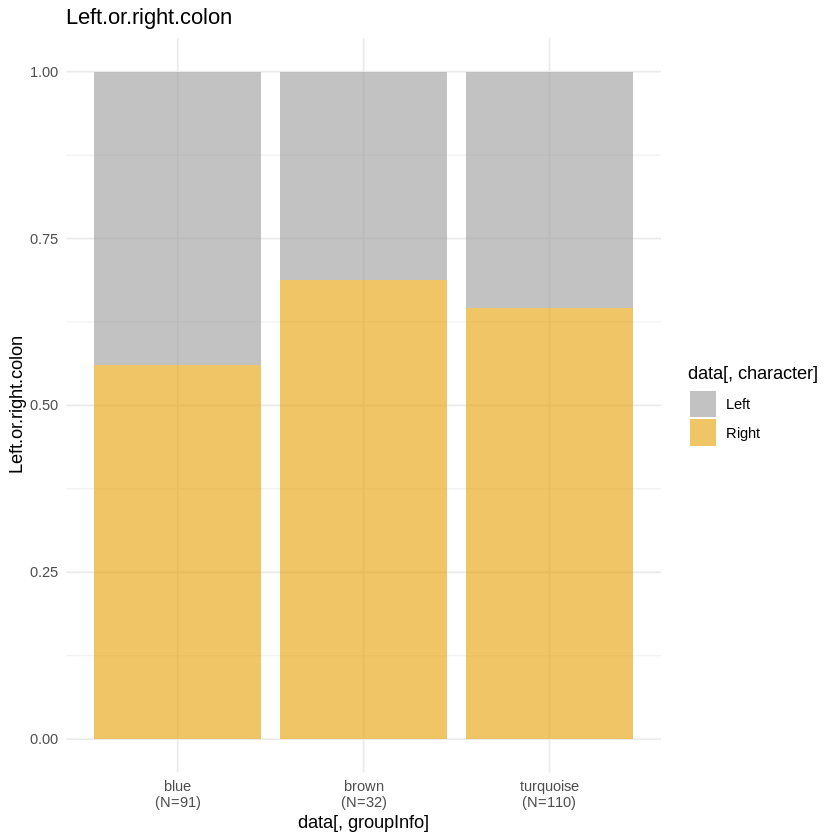

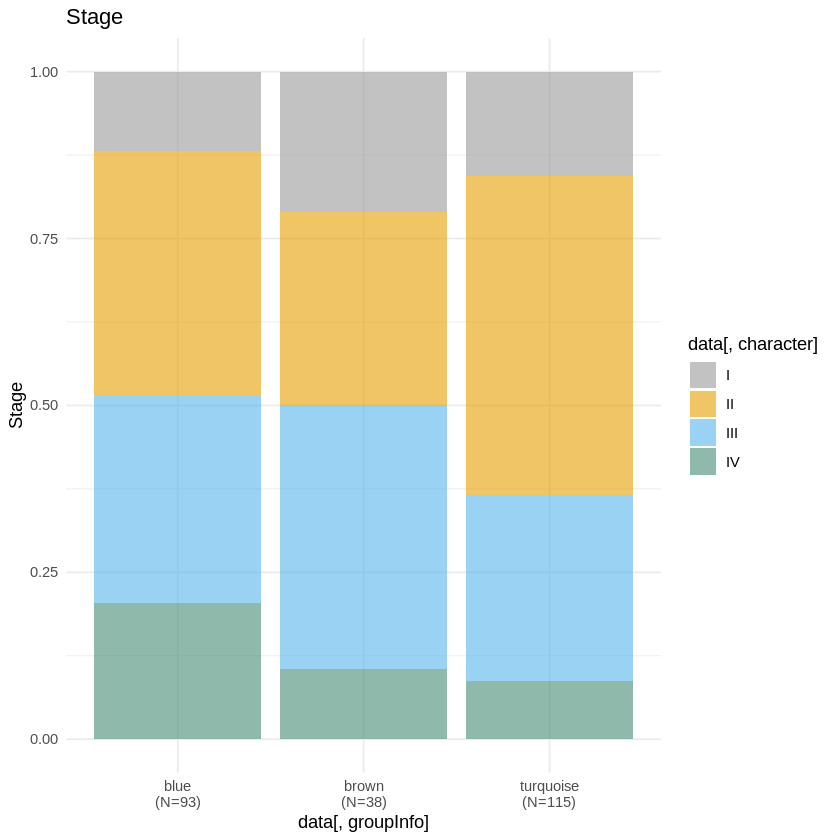

In [2]:
#### 2.Basic_Clinical_data_analysis.R
# Paper: Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
## 1.Read data
COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds")
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset$COAD.GI.Adenocarcinomas.Characteristics
#colnames(COAD.GI.Adenocarcinomas.Characteristics)
## 2.Merge table
MergeTable.GI.Char <- dplyr::left_join(Cluster.df, COAD.GI.Adenocarcinomas.Characteristics, by = "rownames")

## 2.Clinical data Ploting
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
#colnames(MergeTable.GI.Char)
clinical_data <- c("Gender","Pathologic.T","Pathologic.N","Pathologic.M","Pathologic.Stage",
                   "Detailed.Anatomic.Site","Anatomic.Region","Left.or.right.colon",
                   "Stage")
for (i in clinical_data) {
  source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/ggplot2_JH.R")
  p<-ggplot2_barPlot_JH(df = MergeTable.GI.Char,groupInfo = "dynamicColors",
                     character = i,
                     values= alpha(c("#999999", "#E69F00", "#56B4E9",
                                     "#458B74","#8B2323","#68228B",
                                     "#FFEC8B","#CD8C95","#CD8162",
                                     "#20B2AA","#607B8B","#8470FF"),0.6))
  print(p)
  
}

